In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
#data augmentation(more data from existing data)

In [12]:
batch_size=16
training_datagenarator=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,shear_range=0.2,
zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,validation_split=0.1)

In [13]:
train=training_datagenarator.flow_from_directory(r'C:\Users\bussa\Downloads\archive\Training Data',
                                               target_size=(256,256),color_mode='rgb',class_mode='binary'
                                               ,batch_size=batch_size,subset="training")
validation=training_datagenarator.flow_from_directory(r'C:\Users\bussa\Downloads\archive\Training Data',
                                               target_size=(256,256),color_mode='rgb',class_mode='binary'
                                               ,batch_size=batch_size,subset="validation")

Found 12347 images belonging to 2 classes.
Found 1371 images belonging to 2 classes.


In [14]:
import tensorflow as tf
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0

In [16]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\bussa\Downloads\archive\models\model.h5',
                                              monitor='val_loss',mode='min',save_best_only=True)
callbacks=[checkpoint]

In [17]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [18]:
cnn.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(train,validation_data=validation,epochs=1,
                steps_per_epoch=train.samples//batch_size,
               validation_steps=validation.samples//batch_size,
              callbacks=callbacks)




771/771 [==============================] - 1081s 1s/step - loss: 0.0979 - accuracy: 0.9745 - val_loss: 0.0096 - val_accuracy: 0.9963


C:\Users\bussa\Desktop\tf project\tfvenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
from tensorflow.keras.models import load_model
cnn=load_model(r'C:\Users\bussa\Downloads\archive\models\model.h5')

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0

In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [27]:
testing_image=r'C:\Users\bussa\Downloads\archive\Training Data\smoke\10.png'

1/1 [==============================] - 0s 31ms/step
it is smoke


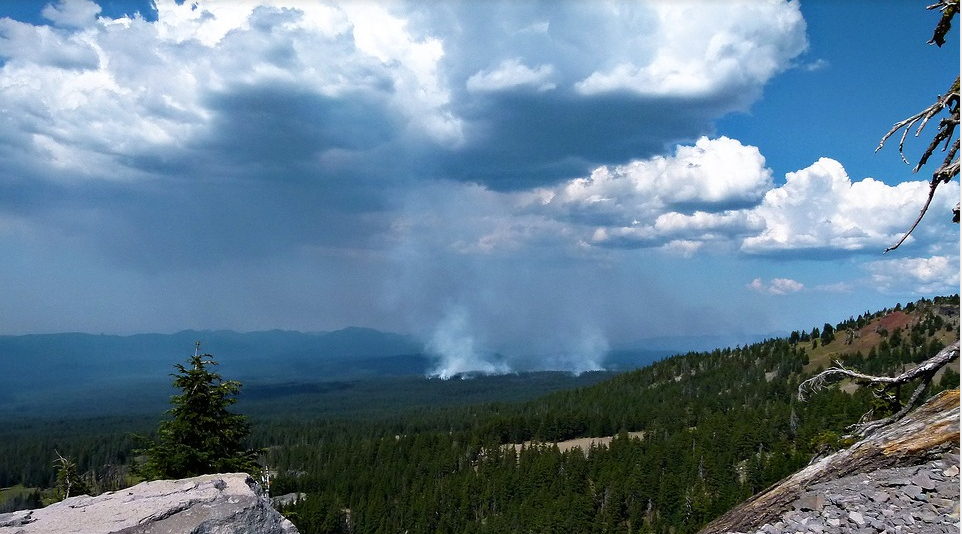

In [29]:
test_image=image.load_img(testing_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255 #rescaling data
test_image=np.expand_dims(test_image,axis=0)
res = (cnn.predict(test_image) > 0.5).astype("int32")
if res[0][0]==0:
    print("it is fire")
else:
    print("it is smoke")
PIL.Image.open(testing_image)